In [65]:
#Importing necessary libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
pd.options.mode.chained_assignment = None
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [66]:
#Read data
world_rankings = pd.read_csv("CAP4763GroupBishopBandages-csv.csv")

In [67]:
#Initial Summary Statistics
#Print data shape
print(world_rankings.shape)

(2341, 13)


In [68]:
#Print data head
print(world_rankings.head)

<bound method NDFrame.head of      University Rank                     Name of University        Location  \
0                  1                   University of Oxford  United Kingdom   
1                  2                     Harvard University   United States   
2                  3                University of Cambridge  United Kingdom   
3                  3                    Stanford University   United States   
4                  5  Massachusetts Institute of Technology   United States   
...              ...                                    ...             ...   
2336               -     University of the West of Scotland             NaN   
2337               -                  University of Windsor             NaN   
2338               -            University of Wolverhampton             NaN   
2339               -                University of Wuppertal             NaN   
2340               -    Xi’an Jiaotong-Liverpool University             NaN   

     No of student  N

In [69]:
#Print data columns
print(world_rankings.columns)

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'No of student per staff', 'International Student', 'Female:Male Ratio',
       'OverAll Score', 'Teaching Score', 'Research Score', 'Citations Score',
       'Industry Income Score', 'International Outlook Score'],
      dtype='object')


In [70]:
#Replace whitespace in headings with underscores
world_rankings.columns = world_rankings.columns.str.replace(" ","_")

In [71]:
#Print summary statistics before cleaning and transforming data
print(world_rankings.describe(include=np.number))
print(world_rankings.describe(include=object))

       No_of_student_per_staff  Teaching_Score  Research_Score  \
count              2208.000000     1799.000000     1799.000000   
mean                 19.000408       27.018010       23.016898   
std                  12.132224       13.282243       16.763819   
min                   0.400000       11.600000        7.400000   
25%                  12.600000       18.000000       11.300000   
50%                  16.600000       22.700000       17.000000   
75%                  22.200000       31.850000       28.900000   
max                 232.200000       94.800000       99.700000   

       Citations_Score  Industry_Income_Score  International_Outlook_Score  
count      1799.000000            1799.000000                  1799.000000  
mean         48.495887              47.104558                    46.880378  
std          27.967185              15.093682                    22.582401  
min           0.800000              36.900000                    14.100000  
25%          23.1000

In [72]:
#Cleaning and Transforming Data
#Check for missing data and drop records with missing data
print(world_rankings.isnull().sum())
wr_cleaned = world_rankings.dropna()
wr_cleaned = wr_cleaned.reset_index()

University_Rank                  0
Name_of_University             108
Location                       294
No_of_student                  132
No_of_student_per_staff        133
International_Student          132
Female:Male_Ratio              213
OverAll_Score                  542
Teaching_Score                 542
Research_Score                 542
Citations_Score                542
Industry_Income_Score          542
International_Outlook_Score    542
dtype: int64


In [73]:
#Check what the new dataframe looks like and confirm no missing data
print(wr_cleaned.head)
print(wr_cleaned.isnull().sum())

<bound method NDFrame.head of       index University_Rank                            Name_of_University  \
0         0               1                          University of Oxford   
1         1               2                            Harvard University   
2         2               3                       University of Cambridge   
3         3               3                           Stanford University   
4         4               5         Massachusetts Institute of Technology   
...     ...             ...                                           ...   
1483   1692           1501+  Wrocław University of Science and Technology   
1484   1693           1501+                          Yamaguchi University   
1485   1694           1501+                            Yanshan University   
1486   1695           1501+                           Yeditepe University   
1487   1696           1501+            Zonguldak Bülent Ecevit University   

            Location No_of_student  No_of_stu

In [74]:
#Transform Female:Male_Ratio to a proportion for better analysis
wr_cleaned["Female:Male_Ratio"] = wr_cleaned["Female:Male_Ratio"].str.slice(0,2)

In [75]:
#Drop the records that have unusable proportions
counter = 0
records_to_drop=[]
for x in wr_cleaned["Female:Male_Ratio"]:
    if x[0] == "1" or x[0] == "0":
        records_to_drop.append(counter)
    counter = counter+1
wr_cleaned = wr_cleaned.drop(records_to_drop)
wr_cleaned = wr_cleaned.reset_index()

In [76]:
#Clean up the Female_Student_Proportion column
wr_cleaned["Female:Male_Ratio"] = wr_cleaned["Female:Male_Ratio"].astype(float)
wr_cleaned["Female:Male_Ratio"] = wr_cleaned["Female:Male_Ratio"]/100
wr_cleaned = wr_cleaned.rename(columns = {"Female:Male_Ratio":"Female_Student_Proportion"})

In [77]:
#Drop previous unnecessary index columns
wr_cleaned = wr_cleaned.drop(axis=1,columns=["level_0","index"])

In [78]:
#Make the International_Student column a float and proportion for better analysis
wr_cleaned["International_Student"] = wr_cleaned["International_Student"].str.replace("%","")
wr_cleaned["International_Student"] = wr_cleaned["International_Student"].str.replace(" ","")
counter2=0
for y in wr_cleaned["International_Student"]:
    if wr_cleaned["International_Student"][counter2]=="":
        wr_cleaned["International_Student"][counter2] = "0"
    counter2 = counter2+1
wr_cleaned["International_Student"] = wr_cleaned["International_Student"].astype(float)
wr_cleaned["International_Student"] = wr_cleaned["International_Student"]/100
wr_cleaned = wr_cleaned.rename(columns = {"International_Student":"International_Student_Proportion"})

In [79]:
#Make the No_of_students column a float for better analysis
wr_cleaned["No_of_student"] = wr_cleaned["No_of_student"].str.replace(",","")
wr_cleaned["No_of_student"] = wr_cleaned["No_of_student"].astype(float)

In [80]:
#Take the average of the ranges for University_Rank and assign it instead for better analysis
counter3=0
for z in wr_cleaned["University_Rank"]:
    if z == "201–250":
        wr_cleaned.University_Rank[counter3] = "225"
    elif z == "251–300":
        wr_cleaned.University_Rank[counter3] = "275"
    elif z == "301–350":
        wr_cleaned.University_Rank[counter3] = "325"
    elif z == "351–400":
        wr_cleaned.University_Rank[counter3] = "375"
    elif z == "401–500":
        wr_cleaned.University_Rank[counter3] = "450"
    elif z == "501–600":
        wr_cleaned.University_Rank[counter3] = "550"
    elif z == "601–800":
        wr_cleaned.University_Rank[counter3] = "700"
    elif z == "801–1000":
        wr_cleaned.University_Rank[counter3] = "900"
    elif z == "1001–1200":
        wr_cleaned.University_Rank[counter3] = "1100"
    elif z == "1201–1500":
        wr_cleaned.University_Rank[counter3] = "1350"
    elif z == "1501+":
        wr_cleaned.University_Rank[counter3] = "1600"
    counter3=counter3+1

In [81]:
#Make the University_Rank a float for better analysis
wr_cleaned["University_Rank"] = wr_cleaned["University_Rank"].astype(float)

In [82]:
#Rename OverAll_Score to Overall_score
wr_cleaned = wr_cleaned.rename(columns = {"OverAll_Score":"Overall_Score"})

In [83]:
#Take the average of the ranges for Overall_Score and assign it instead for better analysis
counter4=0
for a in wr_cleaned.Overall_Score:
    if a == "51.2–54.3":
        wr_cleaned.Overall_Score[counter4] = round((51.2+54.3)/2,ndigits=(1))
    elif a == "48.9–51.1":
        wr_cleaned.Overall_Score[counter4] = round((48.9+51.1)/2,ndigits=(1))
    elif a == "47.0–48.7":
        wr_cleaned.Overall_Score[counter4] = round((47+48.7)/2,ndigits=(1))
    elif a == "45.0–46.9":
        wr_cleaned.Overall_Score[counter4] = round((45+46.9)/2,ndigits=(1))
    elif a == "42.1–44.9":
        wr_cleaned.Overall_Score[counter4] = round((42.1+44.9)/2,ndigits=(1))
    elif a == "39.3–42.0":
        wr_cleaned.Overall_Score[counter4] = round((39.3+42)/2,ndigits=(1))
    elif a == "34.0–39.2":
        wr_cleaned.Overall_Score[counter4] = round((34+39.2)/2,ndigits=(1))
    elif a == "29.8–33.9":
        wr_cleaned.Overall_Score[counter4] = round((29.8+33.9)/2,ndigits=(1))
    elif a == "24.4–29.7":
        wr_cleaned.Overall_Score[counter4] = round((24.4+29.7)/2,ndigits=(1))
    elif a == "18.4–24.3":
        wr_cleaned.Overall_Score[counter4] = round((18.4+24.3)/2,ndigits=(1))
    elif a == "10.4–18.3":
        wr_cleaned.Overall_Score[counter4] = round((10.4+18.3)/2,ndigits=(1))
    counter4 = counter4 + 1


In [84]:
#Make the Overall_Score a float for better analysis
wr_cleaned.Overall_Score = wr_cleaned.Overall_Score.astype(float)

In [85]:
#Summary statistics after revising the dataset to prepare for mining and analysis
#Print data shape
print(wr_cleaned.shape)

(1436, 13)


In [86]:
#Print data head
print(wr_cleaned.head)

<bound method NDFrame.head of       University_Rank                            Name_of_University  \
0                 1.0                          University of Oxford   
1                 2.0                            Harvard University   
2                 3.0                       University of Cambridge   
3                 3.0                           Stanford University   
4                 5.0         Massachusetts Institute of Technology   
...               ...                                           ...   
1431           1600.0  Wrocław University of Science and Technology   
1432           1600.0                          Yamaguchi University   
1433           1600.0                            Yanshan University   
1434           1600.0                           Yeditepe University   
1435           1600.0            Zonguldak Bülent Ecevit University   

            Location  No_of_student  No_of_student_per_staff  \
0     United Kingdom        20965.0                  

In [87]:
#Print data columns
print(wr_cleaned.columns)

Index(['University_Rank', 'Name_of_University', 'Location', 'No_of_student',
       'No_of_student_per_staff', 'International_Student_Proportion',
       'Female_Student_Proportion', 'Overall_Score', 'Teaching_Score',
       'Research_Score', 'Citations_Score', 'Industry_Income_Score',
       'International_Outlook_Score'],
      dtype='object')


In [88]:
#Print stats after cleaning data
print(wr_cleaned.describe(include=np.number))
print(wr_cleaned.describe(include=object))

       University_Rank  No_of_student  No_of_student_per_staff  \
count      1436.000000    1436.000000              1436.000000   
mean        908.687326   23336.572423                18.869777   
std         492.943411   29112.853396                11.816641   
min           1.000000     629.000000                 0.900000   
25%         450.000000    9621.500000                12.600000   
50%         900.000000   17231.000000                16.450000   
75%        1350.000000   29188.750000                22.200000   
max        1600.000000  460632.000000               232.200000   

       International_Student_Proportion  Female_Student_Proportion  \
count                       1436.000000                1436.000000   
mean                           0.100870                   0.517096   
std                            0.118636                   0.108624   
min                            0.000000                   0.240000   
25%                            0.020000                

In [89]:
#Save cleaned CSV before performing mining or analysis
#THIS CSV FILE IS OUR CLEANED DATA, PLEASE COMPARE TO THE RAW DATA TO SEE CHANGES MADE
wr_cleaned.to_csv("CAP4763GroupBishopBandagesCleaned-csv.csv",index=False)

In [90]:
#input data (x, regressor)
x = np.array(wr_cleaned["University_Rank"]).reshape(-1,1)

In [91]:
x.shape

(1436, 1)

In [92]:
print(x)

[[1.0e+00]
 [2.0e+00]
 [3.0e+00]
 ...
 [1.6e+03]
 [1.6e+03]
 [1.6e+03]]


In [93]:
#output data (y, predictor)
y = np.array(wr_cleaned["Overall_Score"])

In [94]:
y.shape

(1436,)

In [95]:
print(y)

[96.4 95.2 94.8 ... 14.4 14.4 14.4]


In [96]:
df_for_PCA = wr_cleaned

In [97]:
features = ['Teaching_Score','Research_Score','Citations_Score','Industry_Income_Score','International_Outlook_Score']

In [98]:
xx = df_for_PCA.loc[:, features].values

In [99]:
yy = df_for_PCA.loc[:,['Location']].values

In [100]:
xx = StandardScaler().fit_transform(xx)

In [101]:
print(xx)

[[ 5.13939052  4.81917068  1.8406777   2.21404703  2.28563645]
 [ 5.3341832   4.77577694  1.85157491  0.30984118  1.56627845]
 [ 5.03030662  4.80677247  1.76802962  0.66219423  2.26730886]
 ...
 [-0.71218157 -0.68563585 -1.09067229  0.11492247 -1.34322681]
 [-0.58751425 -0.60504747 -1.3739998   1.52433467 -0.76590765]
 [-1.02384986 -0.85301173 -0.90178728 -0.4848274  -1.06373103]]


In [102]:
pca = PCA(n_components=2)

In [103]:
principalComponents = pca.fit_transform(xx)

In [104]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [105]:
print(principalDf)

      principal component 1  principal component 2
0                  7.661195               1.069746
1                  6.770140               0.273590
2                  7.005055               0.122494
3                  7.081154               0.974772
4                  7.709638               1.880069
...                     ...                    ...
1431              -1.363554               0.899634
1432              -1.359550               0.784091
1433              -1.663219               1.079320
1434              -0.934973               1.854153
1435              -1.940225               0.370662

[1436 rows x 2 columns]


In [106]:
finalDf = pd.concat([principalDf, df_for_PCA[['Location']]], axis = 1)

In [107]:
print(finalDf)

      principal component 1  principal component 2        Location
0                  7.661195               1.069746  United Kingdom
1                  6.770140               0.273590   United States
2                  7.005055               0.122494  United Kingdom
3                  7.081154               0.974772   United States
4                  7.709638               1.880069   United States
...                     ...                    ...             ...
1431              -1.363554               0.899634          Poland
1432              -1.359550               0.784091           Japan
1433              -1.663219               1.079320           China
1434              -0.934973               1.854153          Turkey
1435              -1.940225               0.370662          Turkey

[1436 rows x 3 columns]


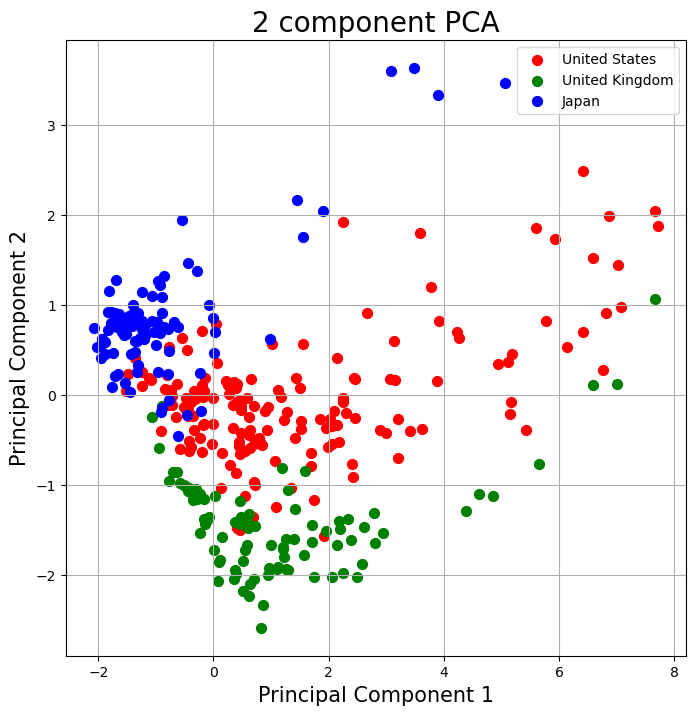

In [108]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["United States","United Kingdom","Japan"]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Location'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [109]:
#Summary statistics of PCA
finalDf.describe()

,principal component 1,principal component 2
count,1.436000e+03,1.436000e+03
mean,7.986493e-16,-3.227842e-17
std,1.715585e+00,9.824398e-01
min,-2.277007e+00,-2.591664e+00
25%,-1.235168e+00,-6.331733e-01
50%,-4.449646e-01,3.056937e-02
75%,6.924196e-01,6.005618e-01
max,7.709638e+00,3.788833e+00


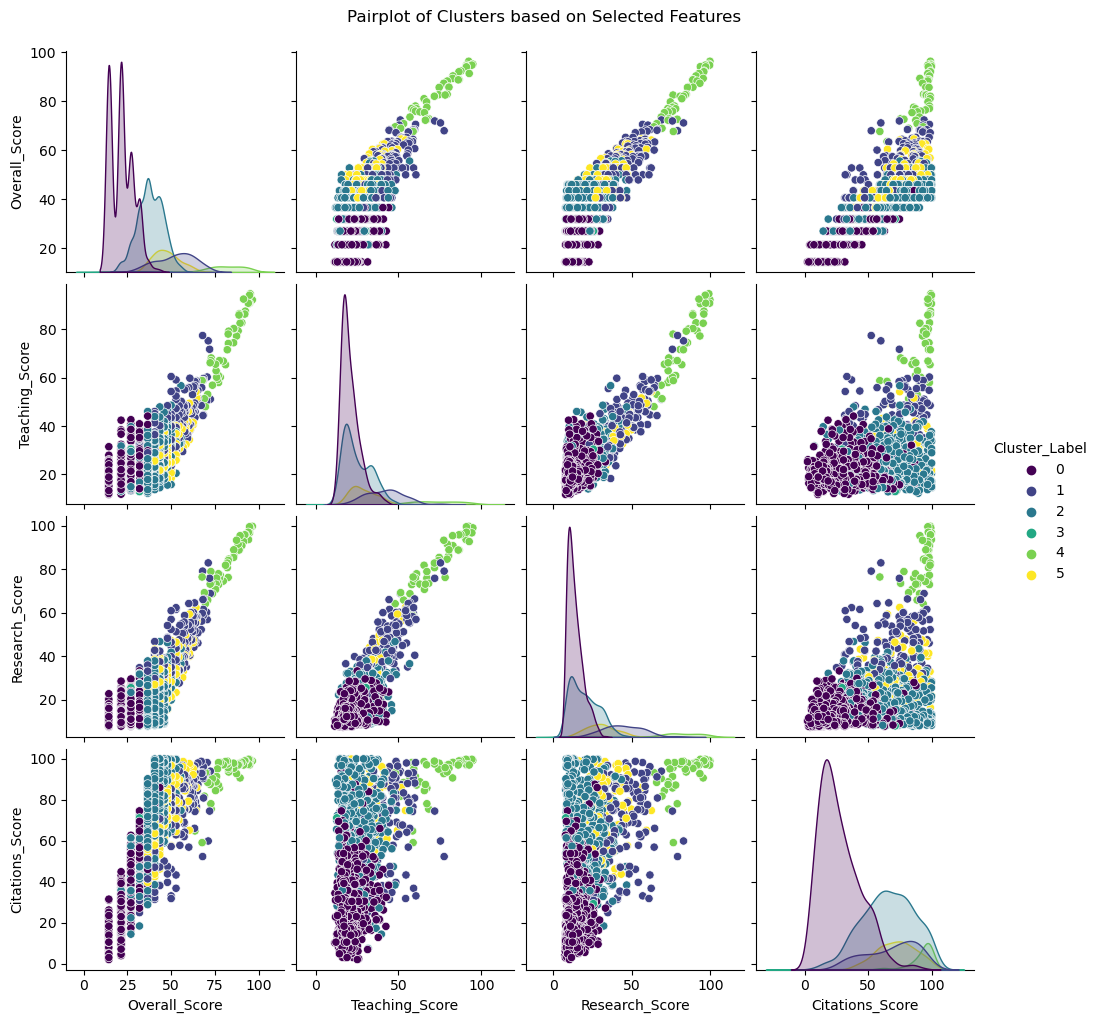

In [110]:
# Data Mining Techniques Method 1: Agglomerative Clustering

# Selecting only numerical columns for clustering
data_numerical = wr_cleaned.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Performing Agglomerative Hierarchical Clustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(data_scaled)

# Adding the cluster labels to the original data
wr_cleaned['Cluster_Label'] = labels


# Selecting a subset of numerical columns for a clearer visualization
selected_features = ['Overall_Score', 'Teaching_Score', 'Research_Score', 'Citations_Score', 'Cluster_Label']
# Creating a pairplot
sns.pairplot(wr_cleaned[selected_features], hue='Cluster_Label', palette='viridis')
plt.suptitle('Pairplot of Clusters based on Selected Features', y=1.02)
plt.show()


In [111]:
# Testing how the clustering model performed

print("Testing the clustering model\n")

from sklearn.metrics import silhouette_score
print("Silhouette score is ", silhouette_score(data_scaled,labels))
print("Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters\n")

from sklearn.metrics import calinski_harabasz_score
print("Calinski score is ", calinski_harabasz_score(data_scaled,labels))
print("With Calinski score, the higher the index, the more separable the clusters\n")

from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin score is ", davies_bouldin_score(data_scaled,labels))
print("With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters\n")

Testing the clustering model

Silhouette score is  0.2137196976923193
Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters

Calinski score is  329.8571431262844
With Calinski score, the higher the index, the more separable the clusters

Davies Bouldin score is  1.3302407092667943
With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters



Best number of clusters: 2
Best silhouette score: 0.28390602807477333


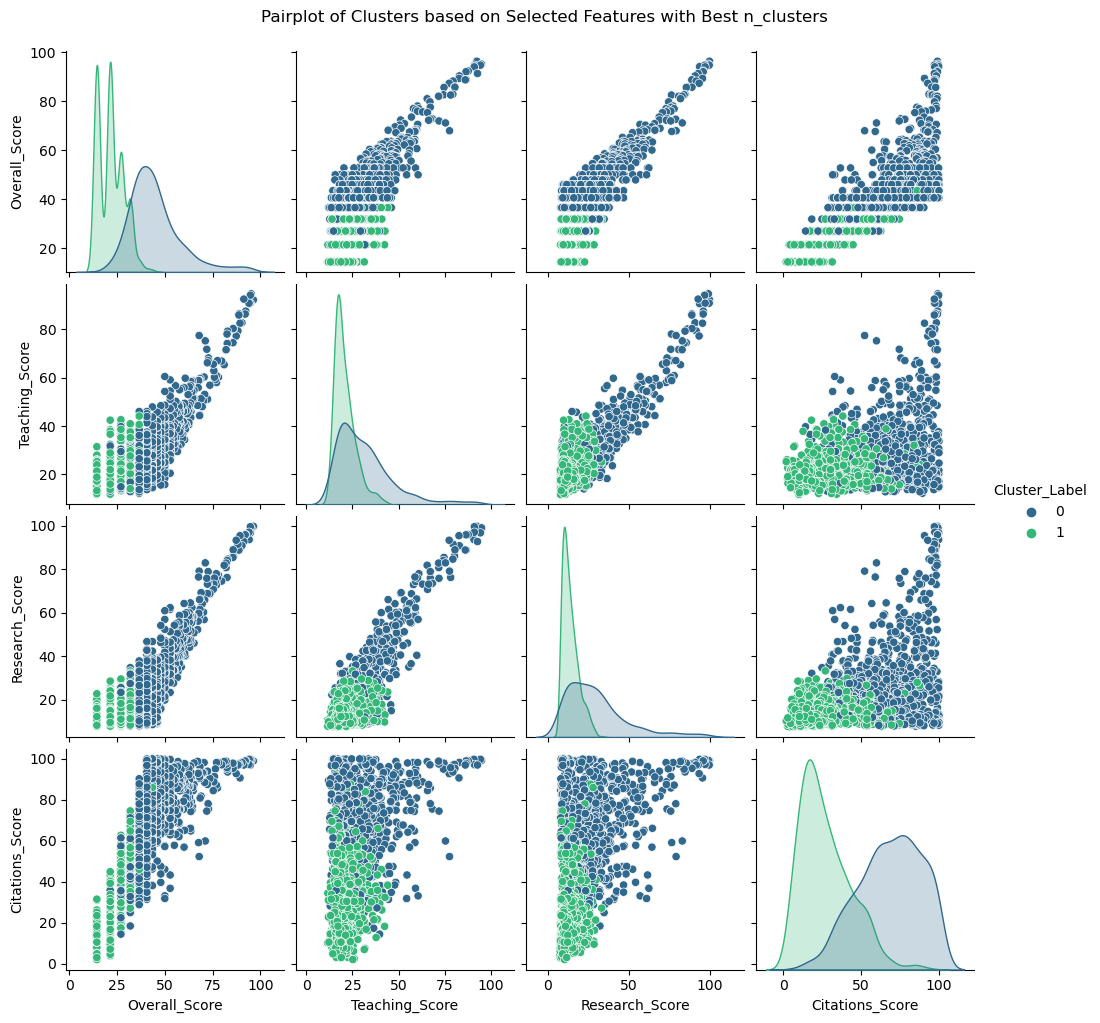

In [112]:
# After tuning
#Selecting only numerical columns for clustering
data_numerical = wr_cleaned.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Range for possible number of clusters
n_clusters_range = range(2, 10)  # Adjust upper limit as necessary

# Dictionary to store the average scores for each n_clusters
silhouette_scores = {}
calinski_scores = {}
davies_scores = {}

# Iterating over the range of n_clusters
for n_clusters in n_clusters_range:
    # Performing Agglomerative Hierarchical Clustering
    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = cluster.fit_predict(data_scaled)

    # Calculating the silhouette score
    score1 = silhouette_score(data_scaled, labels)
    silhouette_scores[n_clusters] = score1
    
    #Calculating the clainski harabasz score
    score2 = calinski_harabasz_score(data_scaled,labels)
    calinski_scores[n_clusters] = score2
    
    #Calculating the davies bouldin score
    score3 = davies_bouldin_score(data_scaled,labels)
    davies_scores[n_clusters] = score3

# Finding the number of clusters with the highest silhouette score
best_n_clusters = max(silhouette_scores, key=silhouette_scores.get)
best_silhouette_score = silhouette_scores[best_n_clusters]
best_calinski_score = calinski_scores[best_n_clusters]
best_davies_score = davies_scores[best_n_clusters]

print(f'Best number of clusters: {best_n_clusters}')
print(f'Best silhouette score: {best_score}')

# Refitting the model with the best number of clusters
best_cluster = AgglomerativeClustering(n_clusters=best_n_clusters, affinity='euclidean', linkage='ward')
wr_cleaned['Cluster_Label'] = best_cluster.fit_predict(data_scaled)

# Visualizing the clusters with the best number of clusters
selected_features = ['Overall_Score', 'Teaching_Score', 'Research_Score', 'Citations_Score', 'Cluster_Label']
sns.pairplot(wr_cleaned[selected_features], hue='Cluster_Label', palette='viridis')
plt.suptitle('Pairplot of Clusters based on Selected Features with Best n_clusters', y=1.02)

# Display the plot
plt.show()


In [113]:
# Testing how the clustering model performed after tuning

print("Testing the clustering model\n")

print("Silhouette score is ", best_score)
print("Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters\n")

print("Calinski score is ", best_calinski_score)
print("With Calinski score, the higher the index, the more separable the clusters\n")

print("Davies Bouldin score is ", best_davies_score)
print("With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters\n")

Testing the clustering model

Silhouette score is  0.28390602807477333
Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters

Calinski score is  606.7304481401643
With Calinski score, the higher the index, the more separable the clusters

Davies Bouldin score is  1.3297547032618535
With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters



In [114]:
# Data Mining Techniques Method 2: K Nearest Neighbor

# Defining 'top-tier' universities as the top 10% based on ranking
top_tier_threshold = wr_cleaned['University_Rank'].quantile(0.1)
wr_cleaned['Top_Tier'] = wr_cleaned['University_Rank'] <= top_tier_threshold

# Selecting features and target variable
X = wr_cleaned.drop(['University_Rank', 'Name_of_University', 'Location', 'Top_Tier'], axis=1)
y = wr_cleaned['Top_Tier']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating and training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test)

In [115]:
# Testing how the KNN model performed

print("Testing the KNN model\n")

# Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the confusion matrix and classification report
classificationSummary(y_test, y_pred)
print("\nClassification Report:\n", class_report)

from sklearn.metrics import silhouette_score
print("Silhouette score is ", silhouette_score(X_test,y_pred))
print("Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters\n")

from sklearn.metrics import calinski_harabasz_score
print("Calinski score is ", calinski_harabasz_score(X_test,y_pred))
print("With Calinski score, the higher the index, the more separable the clusters\n")

from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin score is ", davies_bouldin_score(X_test,y_pred))
print("With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters\n")

Testing the KNN model

Confusion Matrix (Accuracy 0.9814)

       Prediction
Actual   0   1
     0 383   3
     1   5  40

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       386
        True       0.93      0.89      0.91        45

    accuracy                           0.98       431
   macro avg       0.96      0.94      0.95       431
weighted avg       0.98      0.98      0.98       431

Silhouette score is  0.3374975934278204
Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters

Calinski score is  90.44131618545764
With Calinski score, the higher the index, the more separable the clusters

Davies Bouldin score is  1.1696621967286975
With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters



In [116]:
#k-nn tuning 
# Range of k to test
k_values = range(1, 21)  # Adjust this range as needed

# Dictionary to store the average scores for each k
average_scores = {}

# Iterating over the range of k_values
for k in k_values:
    # Creating and training the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Using cross-validation to evaluate the model
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # Change scoring method if needed
    average_scores[k] = np.mean(scores)

# Find the best performing k value
best_k = max(average_scores, key=average_scores.get)
print(f'Best k value: {best_k}')

# Refitting the model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y2_pred = best_knn.predict(X_test)

Best k value: 7


In [117]:
# Testing how the KNN model performed after tuning 

print("Testing the KNN model\n")

# Evaluating the model
conf_matrix2 = confusion_matrix(y_test, y2_pred)
class_report2 = classification_report(y_test, y2_pred)

# Output the confusion matrix and classification report
classificationSummary(y_test, y2_pred)
print("\nClassification Report:\n", class_report2)

from sklearn.metrics import silhouette_score
print("Silhouette score is ", silhouette_score(X_test,y2_pred))
print("Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters\n")

from sklearn.metrics import calinski_harabasz_score
print("Calinski score is ", calinski_harabasz_score(X_test,y2_pred))
print("With Calinski score, the higher the index, the more separable the clusters\n")

from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin score is ", davies_bouldin_score(X_test,y2_pred))
print("With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters\n")

Testing the KNN model

Confusion Matrix (Accuracy 0.9814)

       Prediction
Actual   0   1
     0 385   1
     1   7  38

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       386
        True       0.97      0.84      0.90        45

    accuracy                           0.98       431
   macro avg       0.98      0.92      0.95       431
weighted avg       0.98      0.98      0.98       431

Silhouette score is  0.35162049183021504
Silhouette score has a range of (-1,1), where 1 is an ideal score representing dense and nicely separated clusters

Calinski score is  88.10151424573458
With Calinski score, the higher the index, the more separable the clusters

Davies Bouldin score is  1.1437930456909688
With Davies Bouldin score, the minimum value is 0, where the closer to 0, the better the clusters



In [118]:
# Predictions Techniques Method 1: Multilinear Regression Anyalsis  

# Select columns for regression analysis
predictors = ['Teaching_Score', 'Research_Score', 'Citations_Score', 'Industry_Income_Score', 'International_Outlook_Score']
outcome = 'Overall_Score'
x_predictors = wr_cleaned[predictors]
y_outcome = wr_cleaned[outcome]


# Regression model y on x
university_lm = LinearRegression()
university_lm.fit(x_predictors, y_outcome)

# Regression model, print coefficients
print('Intercept: ', university_lm.intercept_)
print(pd.DataFrame({'Predictor': x_predictors.columns, 'Coefficient': university_lm.coef_}))

# New DataFrame with predictors for prediction
new_data = pd.DataFrame(columns=predictors)

Intercept:  -0.15943345582520863
                     Predictor  Coefficient
0               Teaching_Score     0.295678
1               Research_Score     0.303809
2              Citations_Score     0.300867
3        Industry_Income_Score     0.022426
4  International_Outlook_Score     0.078441


In [119]:
# Predictions Techniques Method 2: Logistic Regression

predictors = 'Location'
outcome = round(wr_cleaned['Overall_Score'])

X3 = pd.get_dummies(wr_cleaned[predictors], drop_first=True)
y3 = outcome

# split into training and validation
train_X3, valid_X3, train_y3, valid_y3 = train_test_split(X3, y3, test_size=0.4, 
                                                      random_state=1)
logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_X3, train_y3)

print('intercept ', logit_full.intercept_[0])

print(pd.DataFrame({'coeff': logit_full.coef_[0]}, index=X3.columns).transpose())

intercept  2.07953833833103
       Argentina  Australia    Austria  Azerbaijan  Bangladesh    Belgium  \
coeff   7.794896  -14.64627 -13.884119         0.0  -13.036795 -13.324489   

       Botswana    Brazil  Brunei Darussalam  Bulgaria  ...    Turkey  Uganda  \
coeff       0.0 -1.954377         -11.938088  7.794896  ... -2.510323     0.0   

         Ukraine  United Arab Emirates  United Kingdom  United States  \
coeff -13.036795            -13.036795      -16.015765     -16.553349   

       Venezuela   Vietnam     Zambia  Zimbabwe  
coeff        0.0 -2.079457 -11.938088       0.0  

[1 rows x 98 columns]
